In [1]:
from typing import List, Tuple
from functools import lru_cache

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os
import wandb

In [18]:
api = wandb.Api()

In [19]:
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_palette('deep')

In [20]:
keys = [
    "eval/mean_episode_agent_score", 
    "eval/mean_episode_agent_turns", 
    "eval/mean_episode_eating_score", 
    "eval/mean_episode_gold_score", 
    "eval/mean_episode_scout_score", 
    "eval/mean_episode_staircase_score", 
    "eval/mean_episode_staircasepet_score", 
    "eval/mean_episode_dlvl", 
    "eval/mean_episode_experience_level", 
    "eval/mean_episode_experience_points", 
    "eval/mean_episode_max_hitpoints", 
    "eval/mean_episode_max_energy", 
    "eval/mean_episode_armor_class", 
    "eval/mean_episode_sokobanfillpit_score", 
    "eval/mean_episode_sokobansolvedlevel_score", 
    "global/env_train_steps",
]

In [21]:
filters = {"config.exp_tags": ["2023_09_22_eval_full"], "config.exp_kind": "eval_stitch"}

In [29]:
runs = api.runs("gmum/nle", filters=filters)
data = []
for run in runs:
    try:
        df = run.history(samples=30000, keys=keys)
        df = pd.DataFrame(df)
        df["seed"] = run.config["seed"]
        df["name"] = run.config["name"]
        df["group"] = run.config["group"]
        df["exp_point"] = run.config["exp_point"]
        data.append(df)
    except Exception as e:
        pass

data = pd.concat(data, axis=0).reset_index()

In [23]:
data.to_csv("raw.csv", header=None)

In [ ]:
data = pd.read_csv("raw.csv")

In [30]:
data["index"] = data["_step"] - data["_step"] % 10_000_000

In [31]:
methods = [
    "monk-APPO_",
    "monk-APPO-T",
    "monk-APPO-AA-KLAA-T",
    "monk-APPO-AA-KL-T",
    "monk-APPO-AA-KS-T",
    "monk-APPO-AA-BC-T",
]

method_names = [
    "monk-APPO",
    "monk-APPO-T",
    "monk-APPO-AA-KLAA-T",
    "monk-APPO-AA-KLBC-T",
    "monk-APPO-AA-KS-T",
    "monk-APPO-AA-CEAA-T",
]

folders = []
folders.append("None")
for i in range(2, 10):
    folder = f"saves{i}"
    folders.append(folder)
folders.append("sokoban")

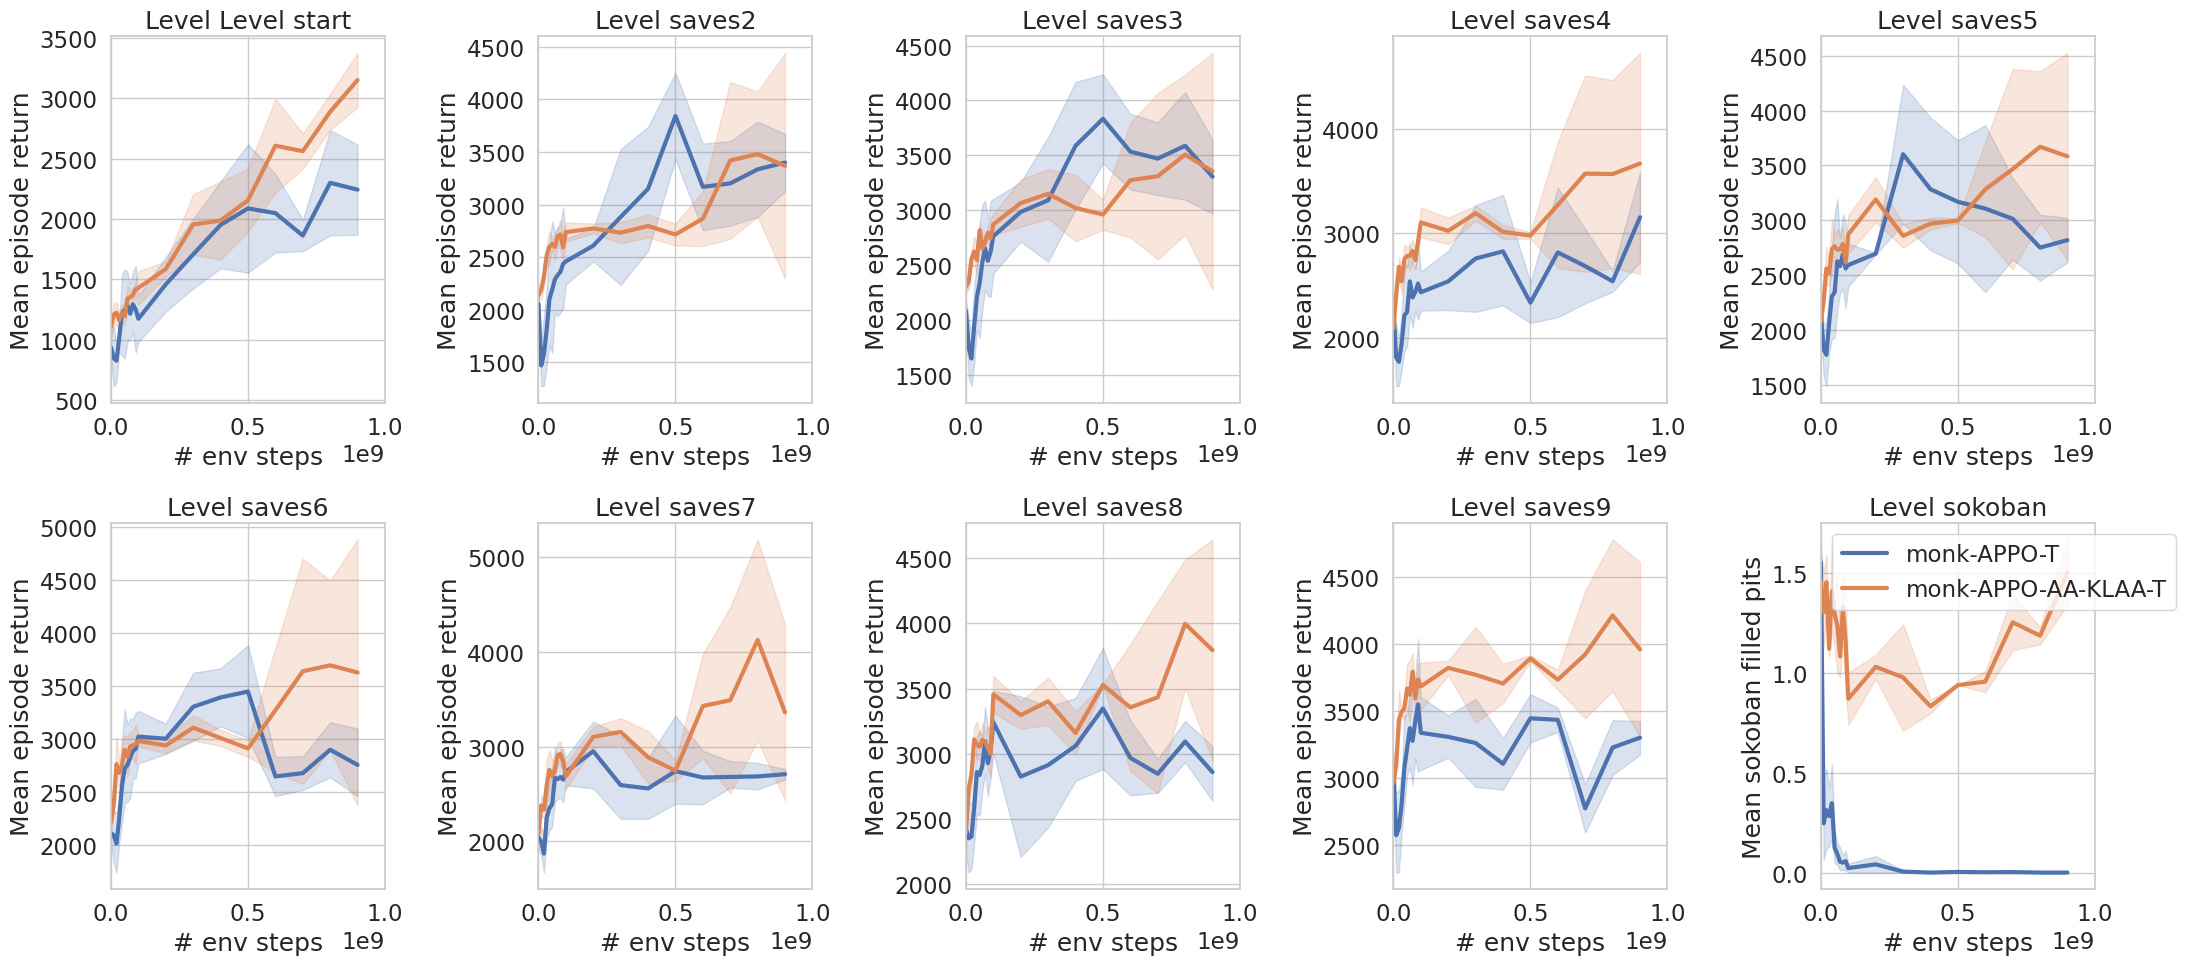

In [38]:
n_rows = 2
n_cols = len(folders) // 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, 10))

axes = axes.flatten()
legend_handles = []  # Create an empty list to collect legend handles
legend_labels = []   # Create an empty list to collect legend labels

for idx, (ax, level) in enumerate(zip(axes, folders)):
    eval_column = "eval/mean_episode_sokobanfillpit_score" if level == "sokoban" else 'eval/mean_episode_agent_score' 
    level_data = data[data["name"].str.contains(level)]
    for method, method_name in zip(methods, method_names):
        method_data = level_data[level_data["group"].str.contains(method)]

        method_data = method_data.replace('NaN', pd.NA).dropna()

        legend = "full" if idx == 0 else None
        sns.lineplot(data=method_data, x="index", y=eval_column, ax=ax, errorbar=('ci', 90), linewidth=3, legend=legend, label=method_name)

        if idx == len(folders) - 1:
            ax.set_ylabel("Mean sokoban filled pits")
        else:
            ax.set_ylabel("Mean episode return")
        
        ax.set_xlabel("# env steps")
        ax.set_xlim(0, 1_000_000_000)
        # ax.set_xlim(0, 90_000_000)
        # ax.set_ylim(0, 4000)
        
        level_name = level if level != "None" else "Level start"
        ax.set_title(f"Level {level_name}")

axes[0].legend().set_visible(False)
axes[-1].legend()

plt.tight_layout()

if n_cols > len(folders):
    for ax in axes[len(folders):]:
        ax.axis('off')

# Show or save the plot
plt.show()

In [3]:
import datetime

In [4]:
end_date = datetime.datetime(2023, 9, 26, 13, 17)

In [14]:
filters2 = {
    "config.exp_tags": ["2023_09_22_eval_full"], 
    "config.exp_kind": "eval",
    "config.exp_point": "monk-APPO",
}

In [15]:
from pathlib import Path

In [16]:
runs = api.runs("gmum/nle", filters=filters2)
print(len(runs))
count = 0 
for run in runs:
    if "APPO_" in run.config["group"]:
        # run.delete()
        count += 1

1718


In [32]:
runs

<Runs gmum/nle>

In [17]:
count

464